<a href="https://colab.research.google.com/github/aaanthonyyy/3020-project/blob/master/notebooks/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.3.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My\ Drive/3020_drive/Colab\ Notebooks/Data

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/3020_drive/Colab Notebooks/Data


In [ ]:
## parameters from @tinkrmind
## https://github.com/tinkrmind/electrical-schematic-recognizer

# Training Parameters
learning_rate = 0.001
num_steps = 500
batch_size = 128

# Network Parameters
dropout = 0.25 # Dropout, probability to drop a unit

# Image Parameters
img_height, img_width = 128, 128

In [ ]:
import pathlib

# data_dir = pathlib.Path('/content/drive/My Drive/3020_drive/Colab Notebooks/Data/Devset')
data_dir = pathlib.Path('/content/drive/My Drive/3020_drive/Data/Devset_12')


In [ ]:
# Loading training dataset from Drive
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9556 files belonging to 5 classes.
Using 7645 files for training.


In [ ]:
# Loading validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)


NameError: ignored

In [ ]:
class_names = train_ds.class_names
print('Number of Classes:',len(class_names))
print(class_names)

Number of Classes: 5
['0_diode', '1_resistor', '2_inductor', '3_capacitor', '5_power']


In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

regularization = 0.0001

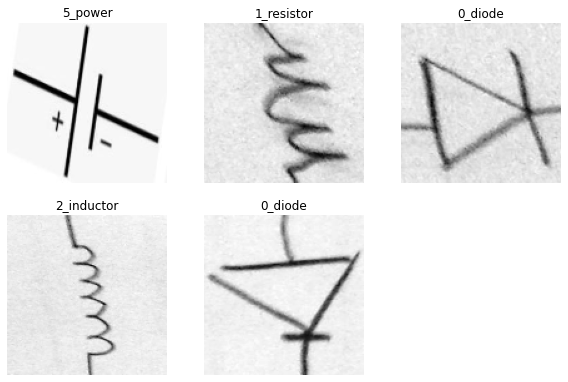

In [ ]:
# Visualizing samples
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.reshape(images[i], (img_height,img_width)), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),

  layers.Conv2D(32, 5, activation='relu', kernel_regularizer=regularizers.L2(regularization)),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 4, activation='relu', kernel_regularizer=regularizers.L2(regularization)),
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.L2(regularization)),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(256, activation='relu', kernel_regularizer=regularizers.L2(regularization)),

  layers.Dense(len(class_names), activation='softmax', kernel_regularizer=regularizers.L2(regularization))
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=20)

Epoch 1/20
16/60 [=======>......................] - ETA: 37:20 - loss: 1.6344 - accuracy: 0.2603

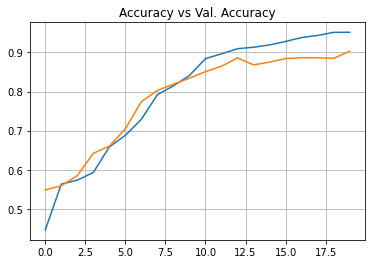

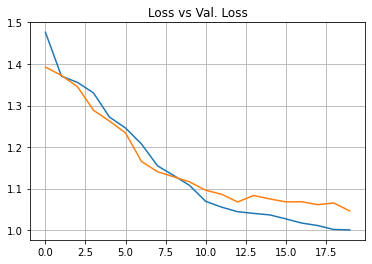

In [ ]:
plt.subplots(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Val. Accuracy")
plt.grid(b=True)

plt.subplots(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs Val. Loss")
plt.grid(b=True)

In [ ]:
# model.save('/content/drive/My Drive/3020_drive/Colab Notebooks/Models/10000_20_epocs')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/3020_drive/Colab Notebooks/Models/10000_20_epocs/assets


In [ ]:
import os

test_dir = '/content/drive/My Drive/3020_drive/Colab Notebooks/Data/Test_set/'

print('\tFILE:\t |\tPREDICTIONS\t |\t' + str(class_names) )
print('-----------------------------------------------------------------------------------------------------------------------')
for file in os.listdir(test_dir):
    img = tf.keras.preprocessing.image.load_img(
        test_dir + file, 
        target_size=(img_width, img_height), 
        color_mode='grayscale')
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)   

    prediction = model.predict(x)
    classes = np.argmax(prediction, axis=-1)

    print(file + '\t |\t ' + class_names[int(classes)] + '\t |\t ' + str(prediction))
    print('\t\t |\t\t\t |')


	FILE:	 |	PREDICTIONS	 |	['0_diode', '1_resistor', '2_inductor', '3_capacitor', '5_power']
-----------------------------------------------------------------------------------------------------------------------
resistor.jpg	 |	 2_inductor	 |	 [[0.00456498 0.47697374 0.5137936  0.00294931 0.00171835]]
		 |			 |
resistor-2.jpg	 |	 3_capacitor	 |	 [[4.8034471e-01 6.8927705e-03 2.5706564e-04 5.1247621e-01 2.9269040e-05]]
		 |			 |
resistor-3.jpg	 |	 1_resistor	 |	 [[2.1672507e-03 9.4449270e-01 5.1841844e-02 1.1128190e-03 3.8539700e-04]]
		 |			 |
resistor-4.jpg	 |	 1_resistor	 |	 [[0.00351289 0.9766335  0.01137177 0.00585296 0.00262886]]
		 |			 |
resistor-5.jpg	 |	 1_resistor	 |	 [[7.0098438e-04 9.8190469e-01 1.6796596e-02 3.2696768e-04 2.7078023e-04]]
		 |			 |
resistor-1.jpg	 |	 2_inductor	 |	 [[0.00456498 0.47697374 0.5137936  0.00294931 0.00171835]]
		 |			 |
inductor-1.jpg	 |	 1_resistor	 |	 [[0.00239453 0.9587685  0.00767167 0.01831952 0.01284569]]
		 |			 |
resistor-6.jpg	 |	 1_res

[[4.8034471e-01 6.8927705e-03 2.5706564e-04 5.1247621e-01 2.9269040e-05]]


Text(0.5, 1.0, 'Prediction: 3_capacitor')

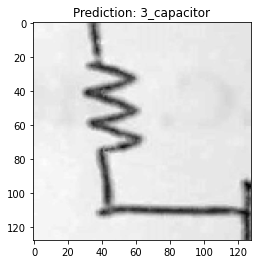

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    '/content/drive/My Drive/3020_drive/Colab Notebooks/Data/Test_set/resistor-2.jpg', 
    target_size=(img_width, img_height), 
    color_mode='grayscale')

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

prediction = model.predict(x)
classes = np.argmax(prediction, axis=-1)

print(prediction)

plt.imshow(img, cmap='gray')
plt.title("Prediction: " + class_names[int(classes)])

In [ ]:
tf.math.confusion_matrix(
    class_names, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

NameError: ignored